In [1]:
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

# CHEKING DISK STORAGE

In [2]:
import shutil

# Get disk space details
total, used, free = shutil.disk_usage("/")

# Convert to human-readable format
def format_size(size):
    for unit in ['B', 'KB', 'MB', 'GB', 'TB']:
        if size < 1024:
            return f"{size:.2f} {unit}"
        size /= 1024

print()
print(f"Total Space: {format_size(total)}")
print(f"Used Space: {format_size(used)}")
print(f"Free Space: {format_size(free)}")
print()


Total Space: 915.32 GB
Used Space: 781.95 GB
Free Space: 86.80 GB



In [3]:
import os

def get_directory_size(directory):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(directory):
        for file in filenames:
            file_path = os.path.join(dirpath, file)
            # Add file size, skipping broken symbolic links
            if os.path.exists(file_path):
                total_size += os.path.getsize(file_path)
    return total_size

def print_directory_size(directory):
    size_bytes = get_directory_size(directory)
    # Convert bytes to a human-readable format (KB, MB, GB)
    for unit in ['B', 'KB', 'MB', 'GB', 'TB']:
        if size_bytes < 1024:
            print(f"Size of '{directory}': {size_bytes:.2f} {unit}")
            break
        size_bytes /= 1024

print()
# Example usage
preprocessed_files_path = "data/train_data/preprocessed_files"  # Change this to your target directory
print_directory_size(preprocessed_files_path)

preprocessed_files_path = "executions"  # Change this to your target directory
print_directory_size(preprocessed_files_path)
print()


Size of 'data/train_data/preprocessed_files': 3.49 GB
Size of 'executions': 8.41 GB



# SPECIFY EXECUTION ID TO EVALUATE


In [4]:
import os

############### EXECUTION SETTINGS ###############

PARENT_EXECUTION_DIR = "executions/swin_unetr/tuning-train-test"

############## EXECUTION ID ######################

EXECUTION_ID = 174 # Update ID

execution_dir = os.path.join(PARENT_EXECUTION_DIR, f"id={EXECUTION_ID}")
print()
print(f"Execution to evaluate: {execution_dir}")
print()


Execution to evaluate: executions/swin_unetr/tuning-train-test/id=174



# LOAD EXECUTION SETTINGS

In [5]:
import json
import pprint

# Load JSON
info_execution_json_file_path = os.path.join(execution_dir, "info_execution.json")

with open(info_execution_json_file_path, "r") as json_file:
    info_execution = json.load(json_file)

# pprint.pprint(info_execution, sort_dicts=False, width=100)
print(info_execution)
print()

################### DATA SETTINGS #################

DATA_DIR = info_execution["DATA_SETTINGS"]["DATA_DIR"] 
# Directory where the samples (data and labels folders) and the metadata.json file are located.

NUM_WORKERS = info_execution["DATA_SETTINGS"]["NUM_WORKERS"]
# Number of logical CPU Cores used for parallelizing data laoding


{'INFO_EXECUTION': {'PARENT_EXECUTION_DIR': 'executions/swin_unetr/tuning-train-test', 'EXECUTION_ID': 174, 'EXECUTION_DIR': 'id=174'}, 'DATA_SETTINGS': {'DATA_DIR': 'data/train_data', 'METADATA_DATASET': 'metadata_37_samples.json', 'K_FOLDS': 6, 'NUM_WORKERS': 4, 'SAMPLES_DATASET': ['R_002', 'R_003', 'R_004', 'R_005', 'R_006', 'R_007', 'R_008', 'R_009', 'R_010', 'R_011', 'R_012', 'R_013', 'R_014', 'R_015', 'R_016', 'R_017', 'R_019', 'R_020', 'Z_002', 'Z_003', 'Z_004', 'Z_005', 'Z_006', 'Z_007', 'Z_008', 'Z_009', 'Z_010', 'Z_011', 'Z_012', 'Z_013', 'Z_014', 'Z_015', 'Z_016', 'Z_017', 'Z_018', 'Z_019', 'Z_020'], 'VALIDATION_SET': ['R_002', 'R_003', 'R_011', 'Z_005', 'Z_008', 'Z_014', 'Z_020'], 'TRAIN_TEST_SPLITS': {'SPLIT_0': {'TRAIN_SET': ['R_004', 'R_005', 'R_007', 'R_008', 'R_009', 'R_013', 'R_014', 'R_015', 'R_016', 'R_017', 'R_019', 'R_020', 'Z_002', 'Z_003', 'Z_006', 'Z_007', 'Z_009', 'Z_010', 'Z_011', 'Z_012', 'Z_015', 'Z_016', 'Z_018', 'Z_019'], 'TEST_SET': ['R_006', 'R_010', 'R

# LOAD DATA SPLITTING INFO

In [6]:
import json
import os


# Load metadata JSON file
metadata_json_path = os.path.join(info_execution["DATA_SETTINGS"]["DATA_DIR"], info_execution["DATA_SETTINGS"]["METADATA_DATASET"])
with open(metadata_json_path, "r") as f:
    metadata = json.load(f)

# Restore validation files
validation_files_original_copy = {sample: metadata[sample] for sample in info_execution["DATA_SETTINGS"]["VALIDATION_SET"]}

# Restore train-test splits
train_test_splits_orginal_copy = []
for split_key, split_data in info_execution["DATA_SETTINGS"]["TRAIN_TEST_SPLITS"].items():
    train_files = {sample: metadata[sample] for sample in split_data["TRAIN_SET"]}
    test_files = {sample: metadata[sample] for sample in split_data["TEST_SET"]}
    train_test_splits_orginal_copy.append((train_files, test_files))

print("✅ Successfully restored `train_test_splits_orginal_copy` and `validation_files_original_copy` from JSON!")

print()

✅ Successfully restored `train_test_splits_orginal_copy` and `validation_files_original_copy` from JSON!



# Import SwinUNETR_AIRT LIGHTNING MODEL

In [7]:
import importlib
from models.swin_unetr import Swin_UNETR_AIRT_lightning_model

# Reload the module (if necessary)
importlib.reload(Swin_UNETR_AIRT_lightning_model)

# Import the class from the reloaded module
from models.swin_unetr.Swin_UNETR_AIRT_lightning_model import SwinUNETR_AIRT_LightningModel
print()

# Import SwinUNETR_AIRT DATASET

In [8]:
import importlib
from models.swin_unetr import Swin_UNETR_AIRT_dataset

# Reload the module (if necessary)
importlib.reload(Swin_UNETR_AIRT_dataset)

# Import the class from the reloaded module
from models.swin_unetr.Swin_UNETR_AIRT_dataset import SwinUNETR_AIRT_Dataset
print()

# Importing libraries

In [9]:
import os
import json
import time
import shutil
import gc
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns  # Used for plotting
from PIL import Image  # Used to save images
from datetime import timedelta, datetime
from sklearn.metrics import auc, confusion_matrix

import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import EarlyStopping, ModelCheckpoint
from pytorch_lightning.loggers import CSVLogger
import optuna

# Functions needed

In [10]:
import importlib
# Own library
import utils.data_utils
importlib.reload(utils.data_utils)
from utils.data_utils import custom_collate

# Function to apply the viridis colormap and convert to uint8
def apply_colormap_and_normalize(array, cmap, vmin, vmax):
    norm_array = (array - vmin) / (vmax - vmin)  # Normalize to [0, 1]
    norm_array = np.clip(norm_array, 0, 1)  # Clip values to avoid overflow
    colormap = plt.get_cmap(cmap)
    rgba_img = colormap(norm_array)  # Apply colormap, returns RGBA
    rgb_img = (rgba_img[:, :, :3] * 255).astype("uint8")  # Convert to RGB
    return rgb_img

# BEST TRIAL IN STUDY

## Summary

In [11]:
tuning_dir = os.path.join(execution_dir, 'tuning')
best_trial_json_path = os.path.join(tuning_dir, "best_trial", "best_trial_summary_info.json")

# Load JSON
with open(best_trial_json_path, "r") as json_file:
    best_trial_config = json.load(json_file)

# Extract the best trial number and validation loss
best_trial_info = best_trial_config.get("MODEL_INFO", {})
best_trial_training_config = best_trial_config.get("TRAINING_CONFIG", {})

val_loss = best_trial_config.get("VAL_LOSS")
val_loss = float(val_loss) if isinstance(val_loss, (int, float)) else None  # Convert only if it's a number

print()
print(f"{'=' * 50}")
print(f"{'=' * 18} BEST TRIAL: {best_trial_config.get('TRIAL_ID', 'N/A')} {'=' * 17}")
print(f"{'=' * 16} Val. Loss: {val_loss:.4f} {'=' * 16}" if val_loss is not None else f"{'=' * 16} Val. Loss: N/A {'=' * 16}")
print(f"{'=' * 50}")
print()

print(f"Total Parameters: {best_trial_info.get('model_total_params', 'N/A')}")
print(f"Trainable Parameters: {best_trial_info.get('model_trainable_params', 'N/A')}")
print(f"Non-Trainable Parameters: {best_trial_info.get('model_non_trainable_params', 'N/A')}")
print(f"FLOPs: {best_trial_info.get('model_gflops_inference', 0.0):.3f} GFLOPs")
print()
print()

# Pretty-print the configurations
pprint.pprint(best_trial_config, sort_dicts=False, width=100)

print()


================== BEST TRIAL: 45 =================
================ Val. Loss: 0.1270 ================

Total Parameters: 4184149
Trainable Parameters: 4184149
Non-Trainable Parameters: 0
FLOPs: 12.620 GFLOPs


{'TRIAL_ID': 45,
 'VAL_LOSS': 0.1270466893911361,
 'MODEL_INFO': {'model_total_params': 4184149,
                'model_trainable_params': 4184149,
                'model_non_trainable_params': 0,
                'model_gflops_inference': 12.619788288},
 'TRAINING_CONFIG': {'lr_optimizer': 0.00010772108579100076,
                     'weight_decay_optimizer': 4.400603422114814e-06,
                     'warmup_epochs_lr_scheduler': 7,
                     'max_training_epochs': 10000,
                     'patience_epochs_early_stopping': 20,
                     'batch_size_training': 3,
                     'batch_size_inference': 1,
                     'num_batches_grad_accumulation': 2,
                     'overlap_training': [0.0, 0.0],
                     'overlap_inf

## Validation Results (Ground Truth vs Prediction)

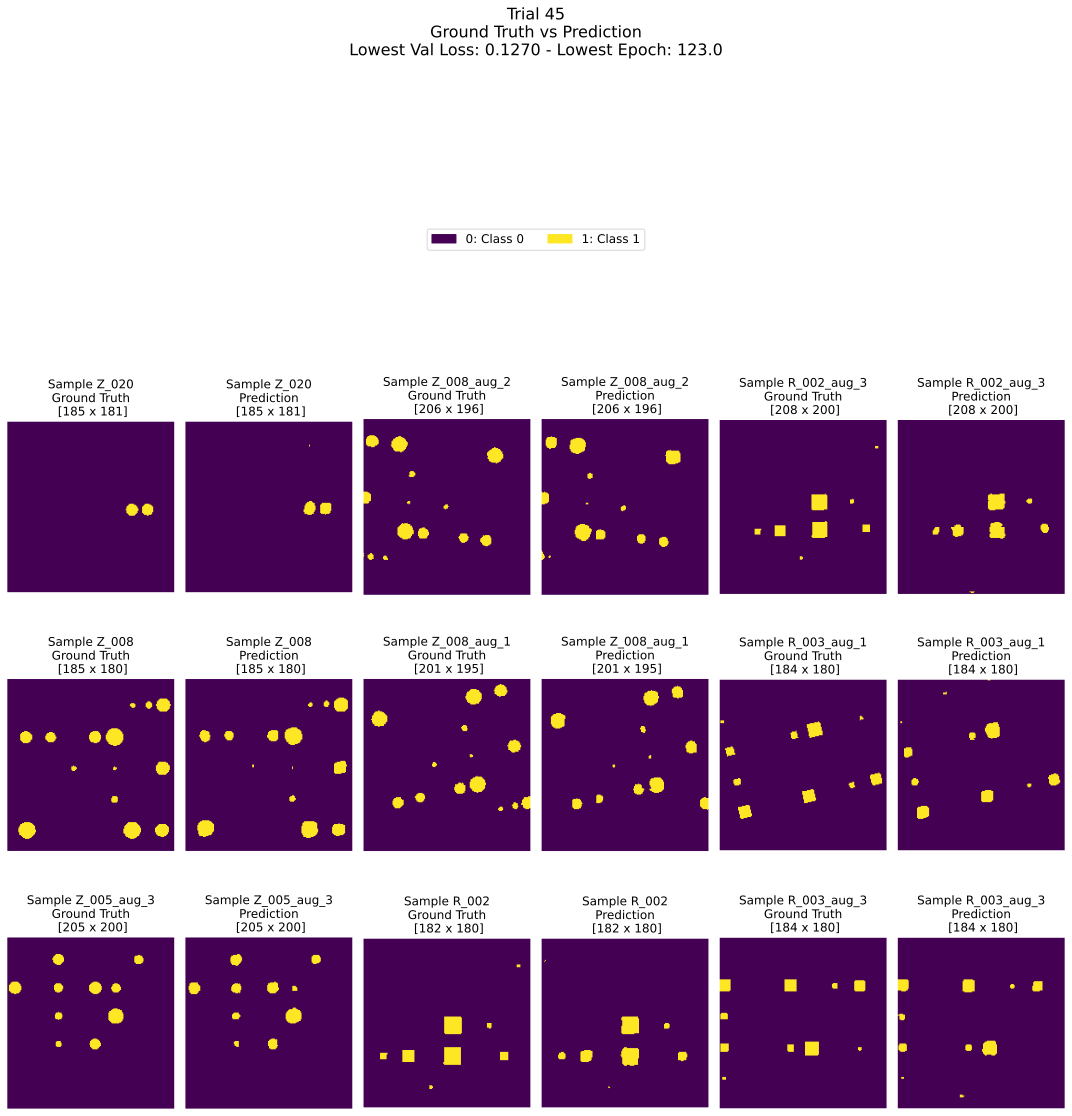

In [12]:
from IPython.display import SVG

svg_file = os.path.join(tuning_dir, "best_trial", f"validation_gt_vs_pred.svg")
# Display the SVG file
SVG(svg_file)  # Replace with your SVG file path

## Training vs Validation Loss Evolution

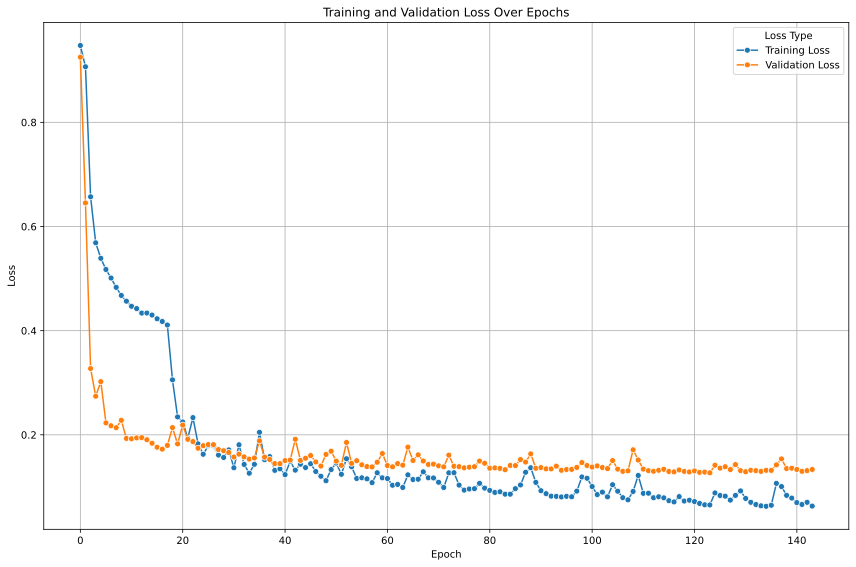

In [13]:
from IPython.display import SVG

svg_file = os.path.join(tuning_dir, "best_trial", f"train_val_loss_evolution.svg")
# Display the SVG file
SVG(svg_file)  # Replace with your SVG file path

# EVALUATION

None
JSON file successfully updated at: executions/swin_unetr/tuning-train-test/id=174/new_evaluation_without_training.json
Evaluation (no training) starts at: 2025-04-12 20:36:49.155780


None
JSON file successfully updated at: executions/swin_unetr/tuning-train-test/id=174/new_evaluation_without_training.json
None
JSON file successfully updated at: executions/swin_unetr/tuning-train-test/id=174/new_evaluation_without_training.json

========== TESTING DATA PREPARATION ==========

 SAMPLES: dict_keys(['R_006', 'R_010', 'R_012', 'Z_004', 'Z_013', 'Z_017'])

==> DATA PREPOCESSING STARTS

Data preprocessing started at: 2025-04-12 20:36:49.157439

Removing the directory '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/inference' and its content ...
The directory '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/inference' and its content have been removed.
The directory '/home/adrian/AIRT_S

Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



Z_017 loaded (preprocessing took 1.61 seconds)


The JSON file '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/inference/preprocessed_info.json' has been updated.

==> DATA PREPOCESSING FINISHED

Data preprocessing ended at: 2025-04-12 20:36:58.804650

Total execution time for data preprocessing: 0:00:09.647211


========== TESTING STARTS ==========

Found checkpoint: executions/swin_unetr/tuning-train-test/id=174/train_test_split_0/best-checkpoint-epoch=76-val_loss=0.15.ckpt


/home/adrian/AIRT_Segmentation_Project/experimenting/.env_experimenting/lib/python3.10/site-packages/lightning_fabric/loggers/csv_logs.py:268: Experiment logs directory executions/swin_unetr/tuning-train-test/id=174/train_test_split_0/ exists and is not empty. Previous log files in this directory will be deleted when the new ones are saved!
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |                                                                                                    …

Starting testing epoch...

==> (TESTING) Average Dice Loss (include_background=[False]): 0.122340

==> (TESTING) Average Mean IoU (include_background=[False]): 0.782382

==> (TESTING) Average Dice Coefficient (include_background=[False]): 0.877418

==> (TESTING) Average FPR (include_background=[False]): 0.004639

==> (TESTING) Average TPR/Recall (include_background=[False]): 0.861777

==> (TESTING) Average Precision (include_background=[False]): 0.894118

Finished testing epoch
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     test_dice_epoch        0.8774175643920898
     test_fpr_epoch        0.0046387589536607265
     test_loss_epoch        0.1223396584391594
   test_mean_iou_epoch      0.7823822498321533
  test_precision_epoch      0.89411848783

/tmp/ipykernel_98765/3967212773.py:338: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap("viridis", num_classes)


Testing results plot for split 0 saved at: executions/swin_unetr/tuning-train-test/id=174/train_test_split_0/testing_results/testing_gt_vs_pred_split_0.svg


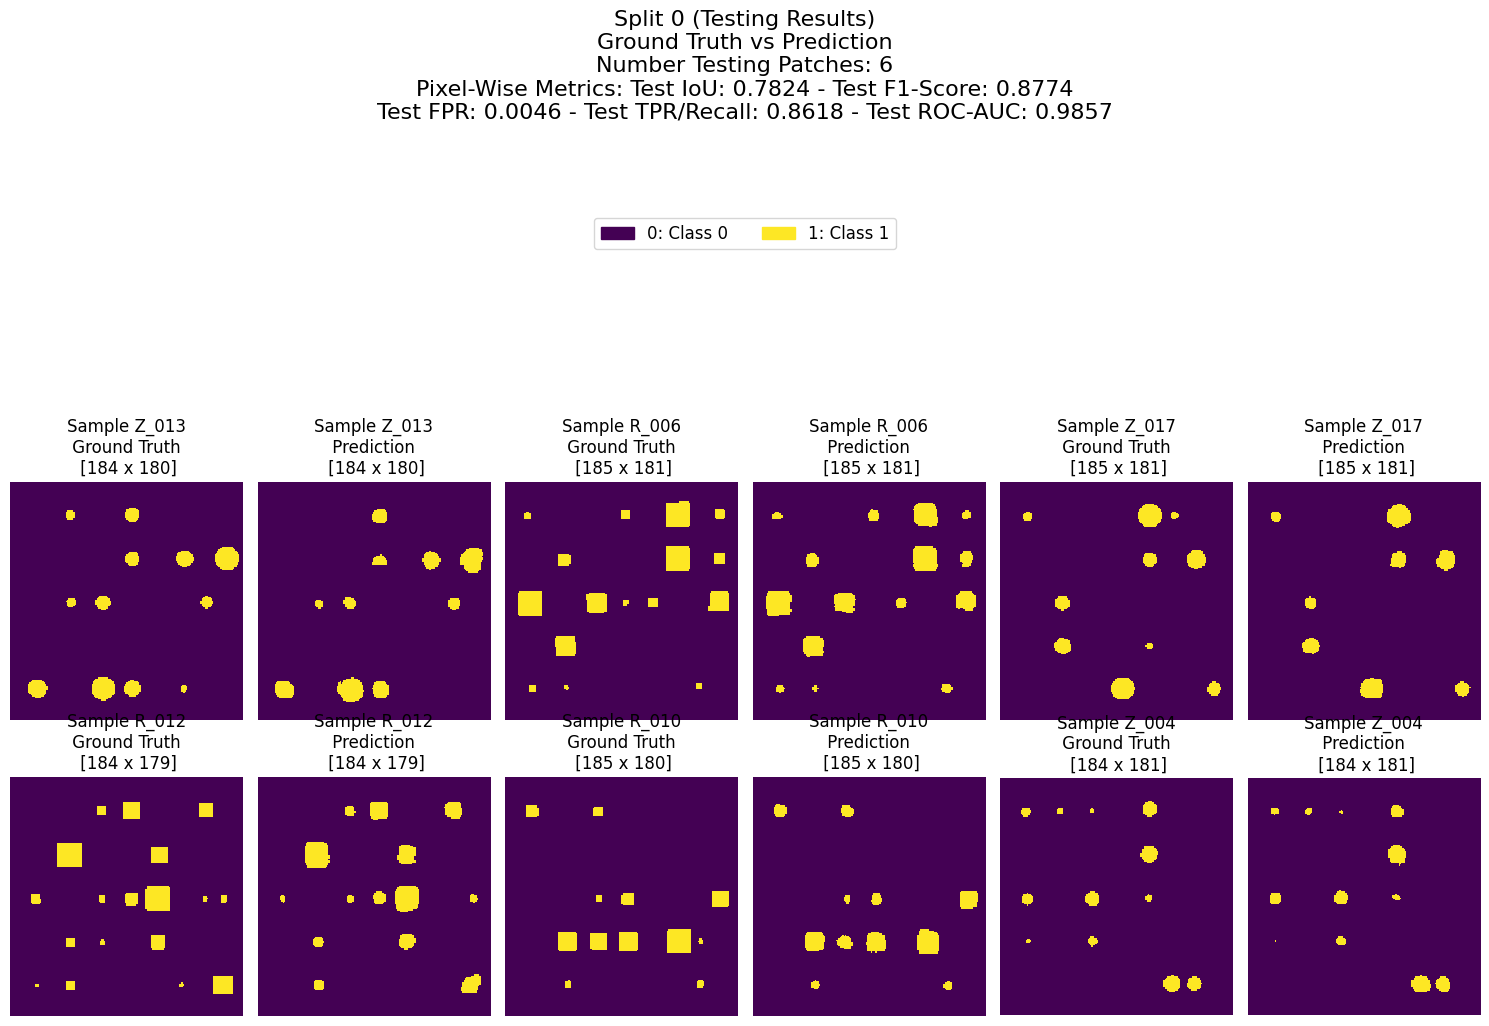

None
JSON file successfully updated at: executions/swin_unetr/tuning-train-test/id=174/new_evaluation_without_training.json
None
JSON file successfully updated at: executions/swin_unetr/tuning-train-test/id=174/new_evaluation_without_training.json

========== TESTING DATA PREPARATION ==========

 SAMPLES: dict_keys(['R_008', 'R_014', 'R_019', 'Z_011', 'Z_015', 'Z_016'])

==> DATA PREPOCESSING STARTS

Data preprocessing started at: 2025-04-12 20:37:23.134410

Removing the directory '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/inference' and its content ...
The directory '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/inference' and its content have been removed.
The directory '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/inference' did not exist and has been created.

Preprocessing sample R_008 ...


R_008 loaded (preprocessing 

Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/adrian/AIRT_Segmentation_Project/experimenting/.env_experimenting/lib/python3.10/site-packages/lightning_fabric/loggers/csv_logs.py:268: Experiment logs directory executions/swin_unetr/tuning-train-test/id=174/train_test_split_1/ exists and is not empty. Previous log files in this directory will be deleted when the new ones are saved!
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Z_016 loaded (preprocessing took 1.58 seconds)


The JSON file '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/inference/preprocessed_info.json' has been updated.

==> DATA PREPOCESSING FINISHED

Data preprocessing ended at: 2025-04-12 20:37:32.796763

Total execution time for data preprocessing: 0:00:09.662353


========== TESTING STARTS ==========

Found checkpoint: executions/swin_unetr/tuning-train-test/id=174/train_test_split_1/best-checkpoint-epoch=85-val_loss=0.14.ckpt


Testing: |                                                                                                    …

Starting testing epoch...

==> (TESTING) Average Dice Loss (include_background=[False]): 0.181811

==> (TESTING) Average Mean IoU (include_background=[False]): 0.698591

==> (TESTING) Average Dice Coefficient (include_background=[False]): 0.817447

==> (TESTING) Average FPR (include_background=[False]): 0.002942

==> (TESTING) Average TPR/Recall (include_background=[False]): 0.778526

==> (TESTING) Average Precision (include_background=[False]): 0.866191

Finished testing epoch
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     test_dice_epoch        0.8174467086791992
     test_fpr_epoch        0.0029418934136629105
     test_loss_epoch        0.18181125819683075
   test_mean_iou_epoch       0.698591411113739
  test_precision_epoch      0.8661914467

/tmp/ipykernel_98765/3967212773.py:338: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap("viridis", num_classes)


Testing results plot for split 1 saved at: executions/swin_unetr/tuning-train-test/id=174/train_test_split_1/testing_results/testing_gt_vs_pred_split_1.svg


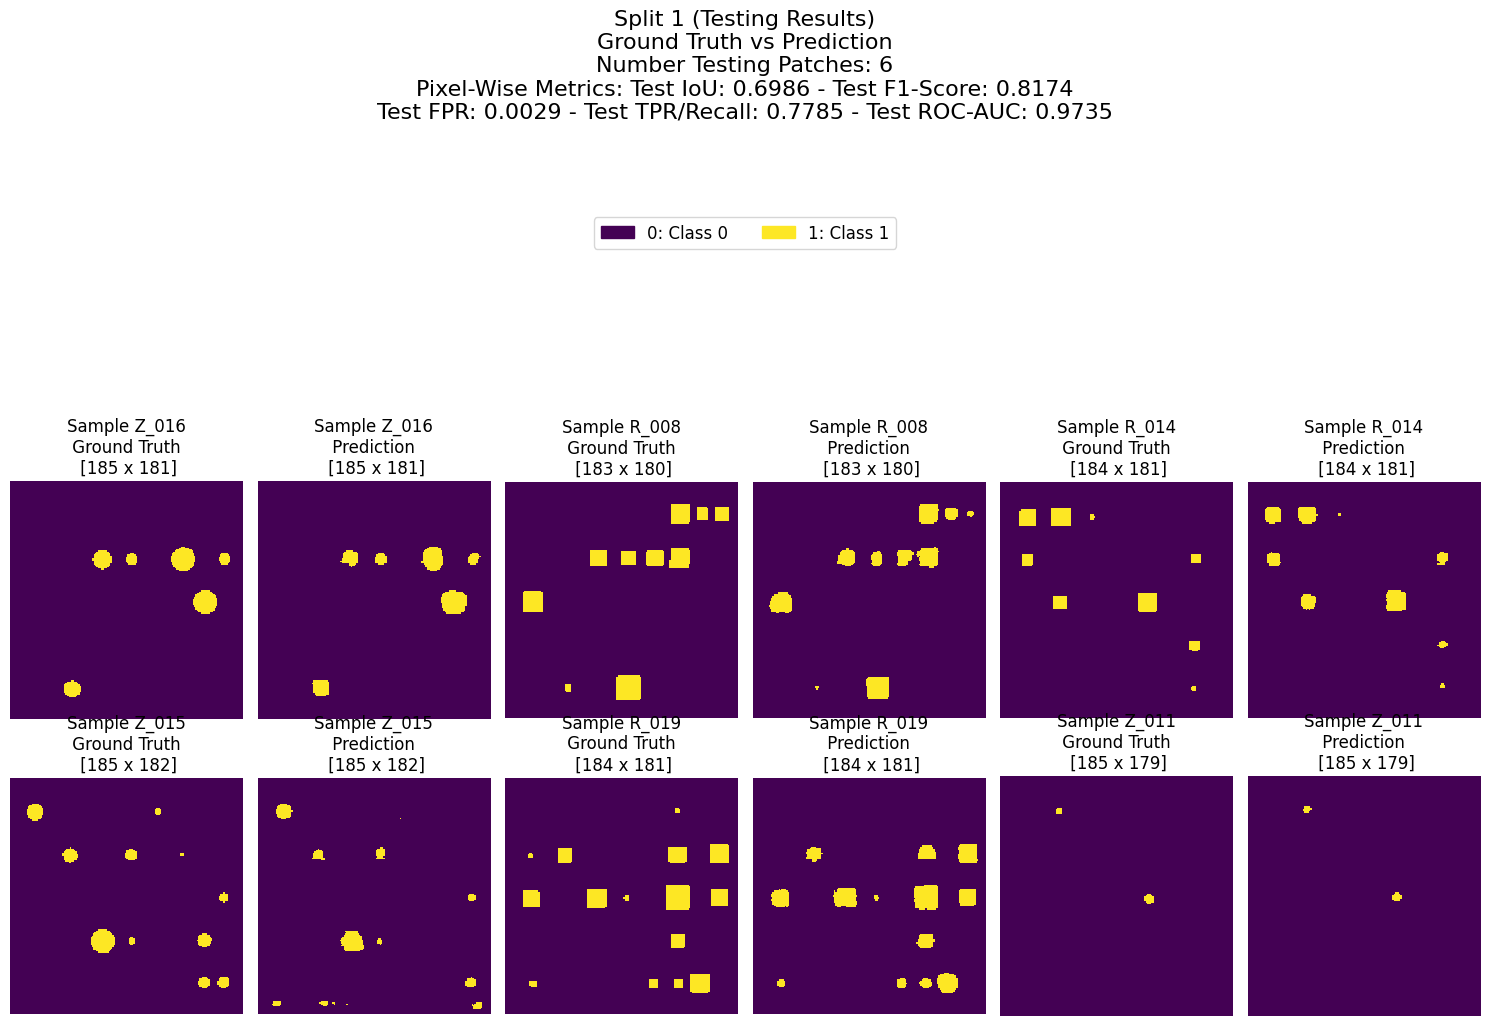

None
JSON file successfully updated at: executions/swin_unetr/tuning-train-test/id=174/new_evaluation_without_training.json
None
JSON file successfully updated at: executions/swin_unetr/tuning-train-test/id=174/new_evaluation_without_training.json

========== TESTING DATA PREPARATION ==========

 SAMPLES: dict_keys(['R_009', 'R_015', 'R_020', 'Z_006', 'Z_009', 'Z_019'])

==> DATA PREPOCESSING STARTS

Data preprocessing started at: 2025-04-12 20:37:55.846760

Removing the directory '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/inference' and its content ...
The directory '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/inference' and its content have been removed.
The directory '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/inference' did not exist and has been created.

Preprocessing sample R_009 ...


R_009 loaded (preprocessing 

Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/adrian/AIRT_Segmentation_Project/experimenting/.env_experimenting/lib/python3.10/site-packages/lightning_fabric/loggers/csv_logs.py:268: Experiment logs directory executions/swin_unetr/tuning-train-test/id=174/train_test_split_2/ exists and is not empty. Previous log files in this directory will be deleted when the new ones are saved!
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Z_019 loaded (preprocessing took 1.61 seconds)


The JSON file '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/inference/preprocessed_info.json' has been updated.

==> DATA PREPOCESSING FINISHED

Data preprocessing ended at: 2025-04-12 20:38:05.466229

Total execution time for data preprocessing: 0:00:09.619469


========== TESTING STARTS ==========

Found checkpoint: executions/swin_unetr/tuning-train-test/id=174/train_test_split_2/best-checkpoint-epoch=51-val_loss=0.15.ckpt


Testing: |                                                                                                    …

Starting testing epoch...

==> (TESTING) Average Dice Loss (include_background=[False]): 0.111777

==> (TESTING) Average Mean IoU (include_background=[False]): 0.802124

==> (TESTING) Average Dice Coefficient (include_background=[False]): 0.889090

==> (TESTING) Average FPR (include_background=[False]): 0.002994

==> (TESTING) Average TPR/Recall (include_background=[False]): 0.889426

==> (TESTING) Average Precision (include_background=[False]): 0.889988

Finished testing epoch
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     test_dice_epoch        0.8890900611877441
     test_fpr_epoch        0.002994448645040393
     test_loss_epoch        0.11177655309438705
   test_mean_iou_epoch      0.8021242022514343
  test_precision_epoch      0.88998752832

/tmp/ipykernel_98765/3967212773.py:338: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap("viridis", num_classes)


Testing results plot for split 2 saved at: executions/swin_unetr/tuning-train-test/id=174/train_test_split_2/testing_results/testing_gt_vs_pred_split_2.svg


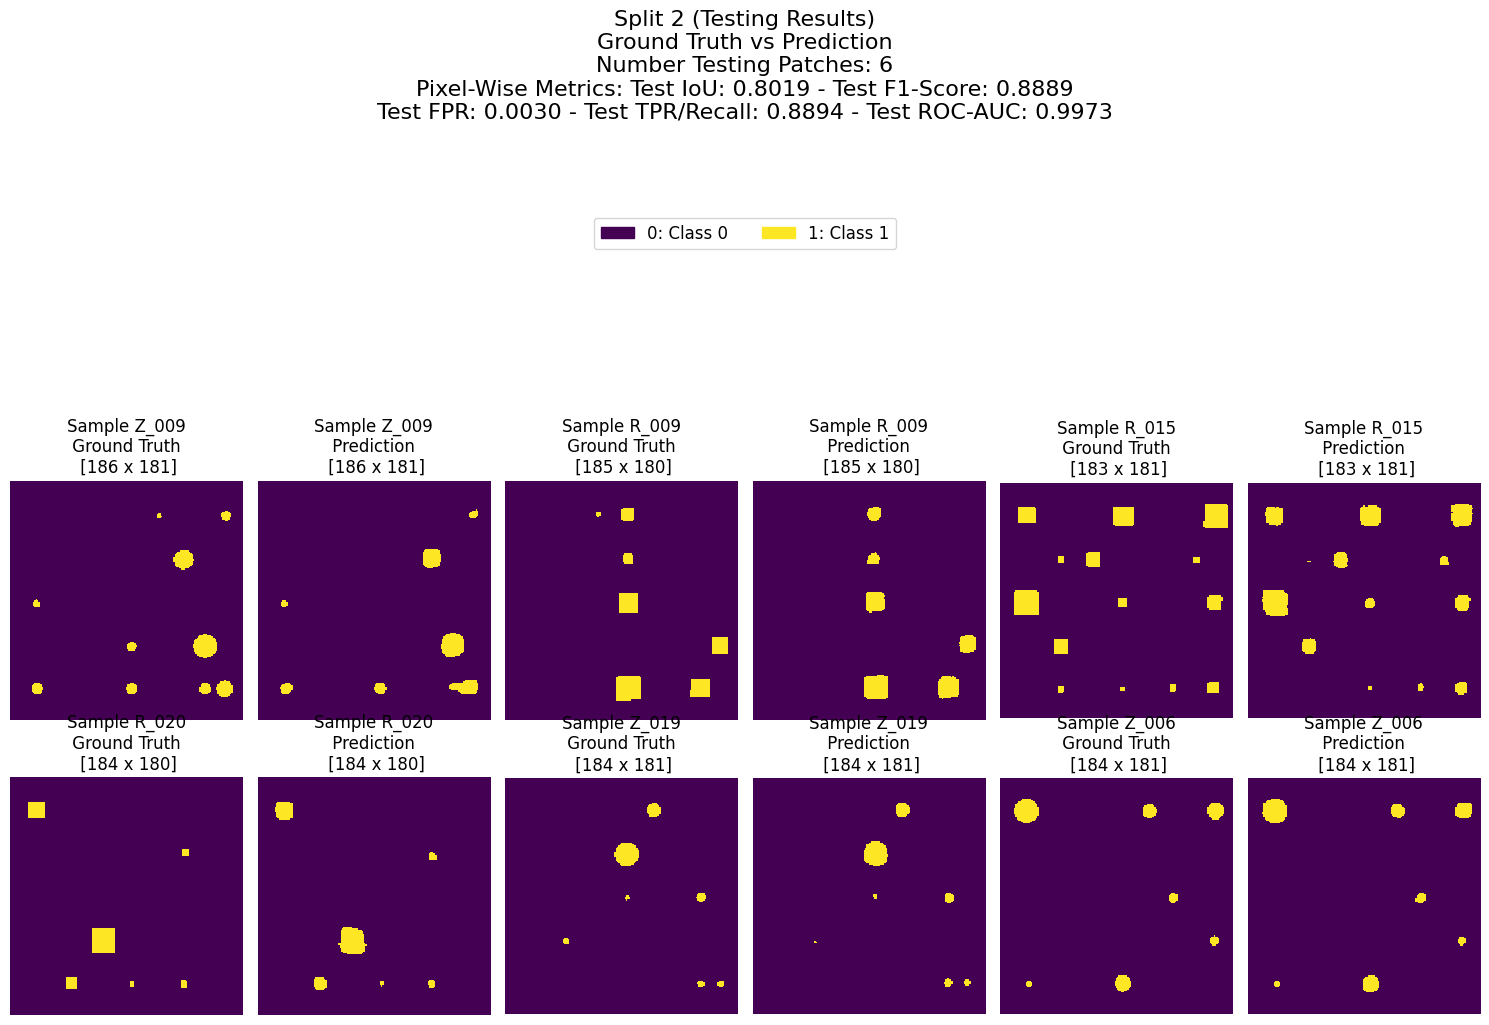

None
JSON file successfully updated at: executions/swin_unetr/tuning-train-test/id=174/new_evaluation_without_training.json
None
JSON file successfully updated at: executions/swin_unetr/tuning-train-test/id=174/new_evaluation_without_training.json

========== TESTING DATA PREPARATION ==========

 SAMPLES: dict_keys(['R_004', 'R_005', 'R_016', 'Z_002', 'Z_007', 'Z_010'])

==> DATA PREPOCESSING STARTS

Data preprocessing started at: 2025-04-12 20:38:28.609136

Removing the directory '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/inference' and its content ...
The directory '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/inference' and its content have been removed.
The directory '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/inference' did not exist and has been created.

Preprocessing sample R_004 ...


R_004 loaded (preprocessing 

Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/adrian/AIRT_Segmentation_Project/experimenting/.env_experimenting/lib/python3.10/site-packages/lightning_fabric/loggers/csv_logs.py:268: Experiment logs directory executions/swin_unetr/tuning-train-test/id=174/train_test_split_3/ exists and is not empty. Previous log files in this directory will be deleted when the new ones are saved!
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Z_010 loaded (preprocessing took 1.60 seconds)


The JSON file '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/inference/preprocessed_info.json' has been updated.

==> DATA PREPOCESSING FINISHED

Data preprocessing ended at: 2025-04-12 20:38:38.304027

Total execution time for data preprocessing: 0:00:09.694891


========== TESTING STARTS ==========

Found checkpoint: executions/swin_unetr/tuning-train-test/id=174/train_test_split_3/best-checkpoint-epoch=62-val_loss=0.14.ckpt


Testing: |                                                                                                    …

Starting testing epoch...

==> (TESTING) Average Dice Loss (include_background=[False]): 0.171120

==> (TESTING) Average Mean IoU (include_background=[False]): 0.728127

==> (TESTING) Average Dice Coefficient (include_background=[False]): 0.829845

==> (TESTING) Average FPR (include_background=[False]): 0.002425

==> (TESTING) Average TPR/Recall (include_background=[False]): 0.832249

==> (TESTING) Average Precision (include_background=[False]): 0.831916

Finished testing epoch
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     test_dice_epoch        0.8298447728157043
     test_fpr_epoch        0.002425147918984294
     test_loss_epoch        0.17112044990062714
   test_mean_iou_epoch      0.7281274199485779
  test_precision_epoch      0.83191579580

/tmp/ipykernel_98765/3967212773.py:338: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap("viridis", num_classes)


Testing results plot for split 3 saved at: executions/swin_unetr/tuning-train-test/id=174/train_test_split_3/testing_results/testing_gt_vs_pred_split_3.svg


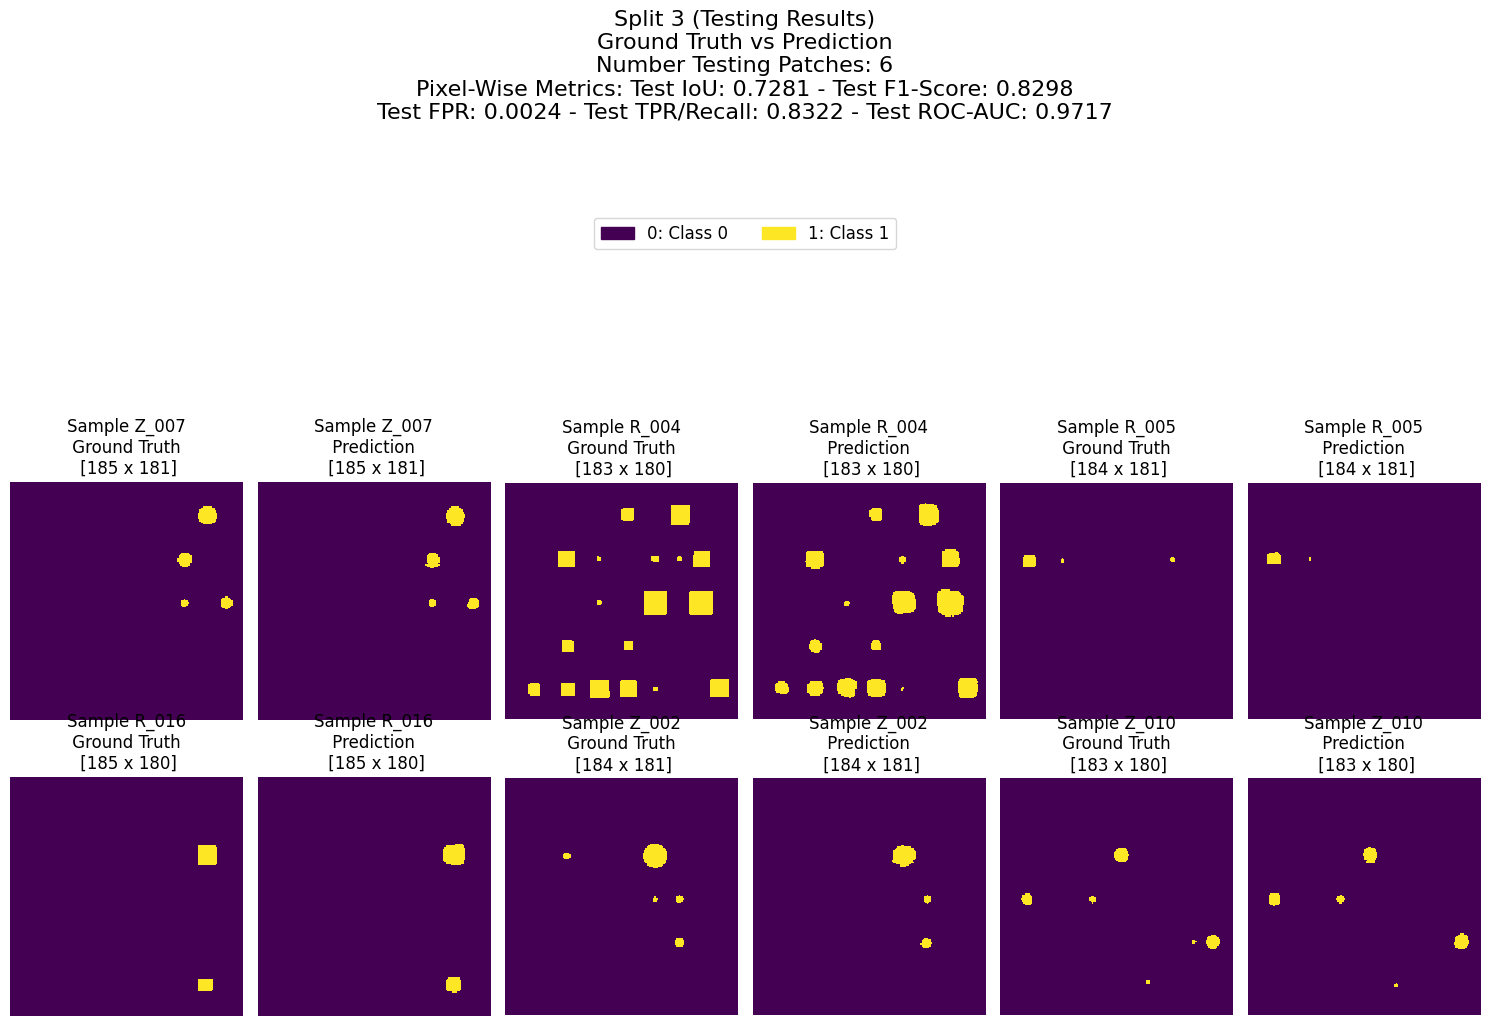

None
JSON file successfully updated at: executions/swin_unetr/tuning-train-test/id=174/new_evaluation_without_training.json
None
JSON file successfully updated at: executions/swin_unetr/tuning-train-test/id=174/new_evaluation_without_training.json

========== TESTING DATA PREPARATION ==========

 SAMPLES: dict_keys(['R_007', 'R_013', 'R_017', 'Z_003', 'Z_012', 'Z_018'])

==> DATA PREPOCESSING STARTS

Data preprocessing started at: 2025-04-12 20:39:01.639449

Removing the directory '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/inference' and its content ...
The directory '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/inference' and its content have been removed.
The directory '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/inference' did not exist and has been created.

Preprocessing sample R_007 ...


R_007 loaded (preprocessing 

Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



Z_018 loaded (preprocessing took 1.60 seconds)


The JSON file '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/inference/preprocessed_info.json' has been updated.

==> DATA PREPOCESSING FINISHED

Data preprocessing ended at: 2025-04-12 20:39:11.202895

Total execution time for data preprocessing: 0:00:09.563446


========== TESTING STARTS ==========

Found checkpoint: executions/swin_unetr/tuning-train-test/id=174/train_test_split_4/best-checkpoint-epoch=104-val_loss=0.15.ckpt


/home/adrian/AIRT_Segmentation_Project/experimenting/.env_experimenting/lib/python3.10/site-packages/lightning_fabric/loggers/csv_logs.py:268: Experiment logs directory executions/swin_unetr/tuning-train-test/id=174/train_test_split_4/ exists and is not empty. Previous log files in this directory will be deleted when the new ones are saved!
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |                                                                                                    …

Starting testing epoch...

==> (TESTING) Average Dice Loss (include_background=[False]): 0.150026

==> (TESTING) Average Mean IoU (include_background=[False]): 0.741048

==> (TESTING) Average Dice Coefficient (include_background=[False]): 0.849509

==> (TESTING) Average FPR (include_background=[False]): 0.002954

==> (TESTING) Average TPR/Recall (include_background=[False]): 0.830358

==> (TESTING) Average Precision (include_background=[False]): 0.877444

Finished testing epoch
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     test_dice_epoch        0.8495094776153564
     test_fpr_epoch         0.00295379594899714
     test_loss_epoch        0.15002582967281342
   test_mean_iou_epoch      0.7410483360290527
  test_precision_epoch      0.87744444608

/tmp/ipykernel_98765/3967212773.py:338: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap("viridis", num_classes)


Testing results plot for split 4 saved at: executions/swin_unetr/tuning-train-test/id=174/train_test_split_4/testing_results/testing_gt_vs_pred_split_4.svg


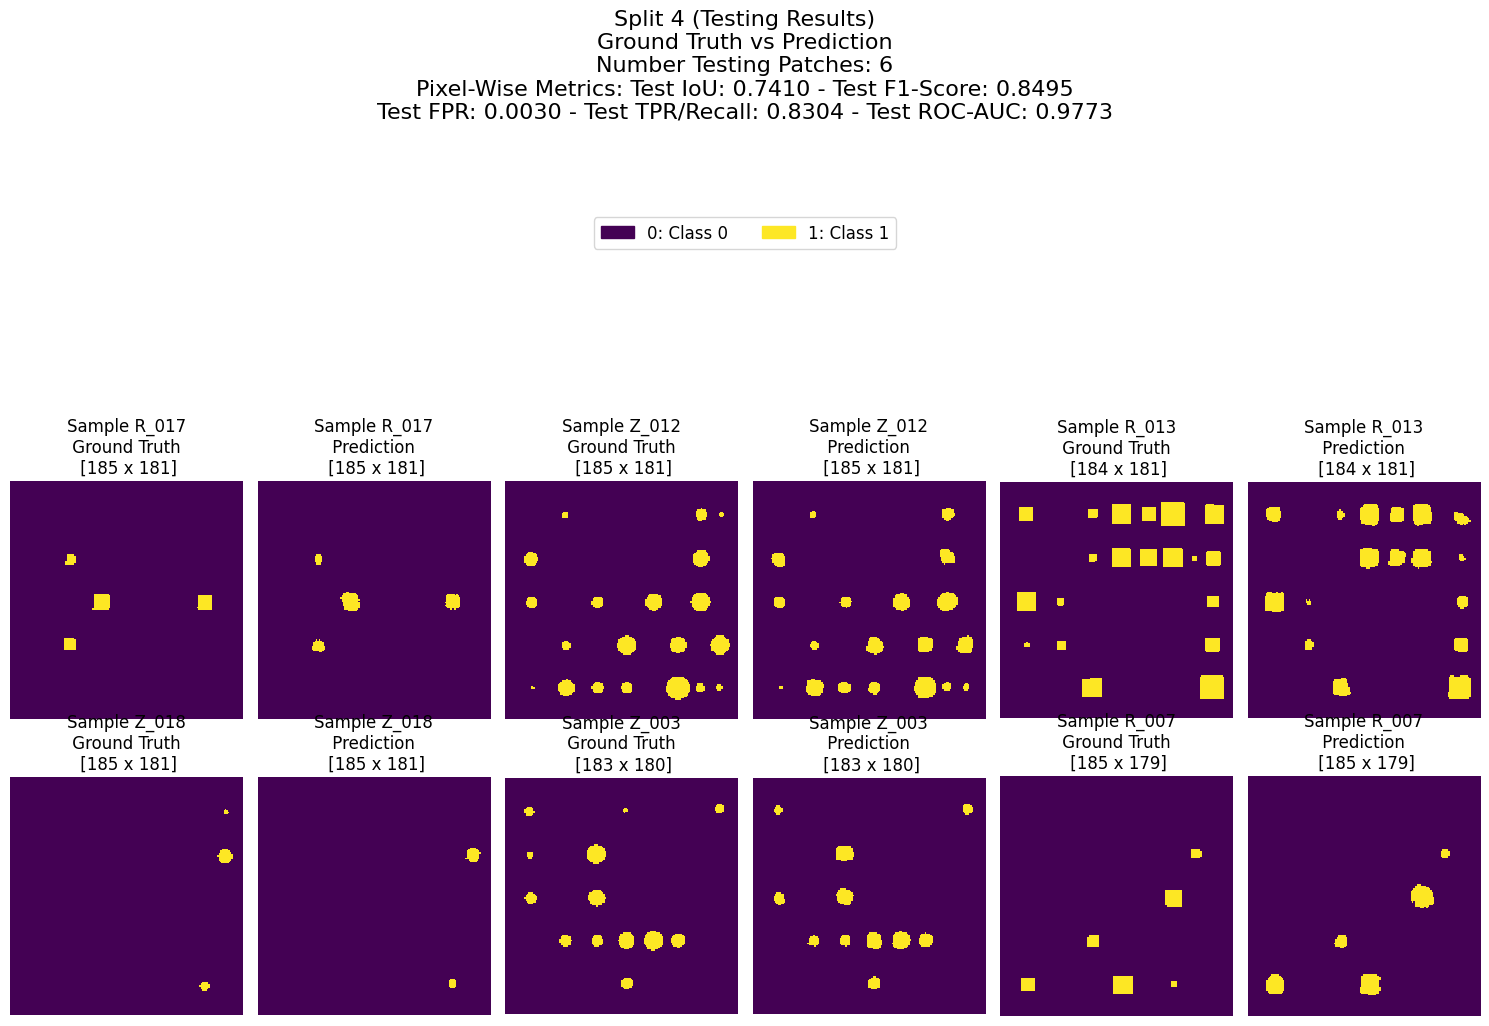

None
JSON file successfully updated at: executions/swin_unetr/tuning-train-test/id=174/new_evaluation_without_training.json
None
JSON file successfully updated at: executions/swin_unetr/tuning-train-test/id=174/new_evaluation_without_training.json

ROC curve saved to: executions/swin_unetr/tuning-train-test/id=174/roc_curves.svg


/tmp/ipykernel_98765/3967212773.py:656: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Evaluation (no training) finishes at: 2025-04-12 20:39:35.212604



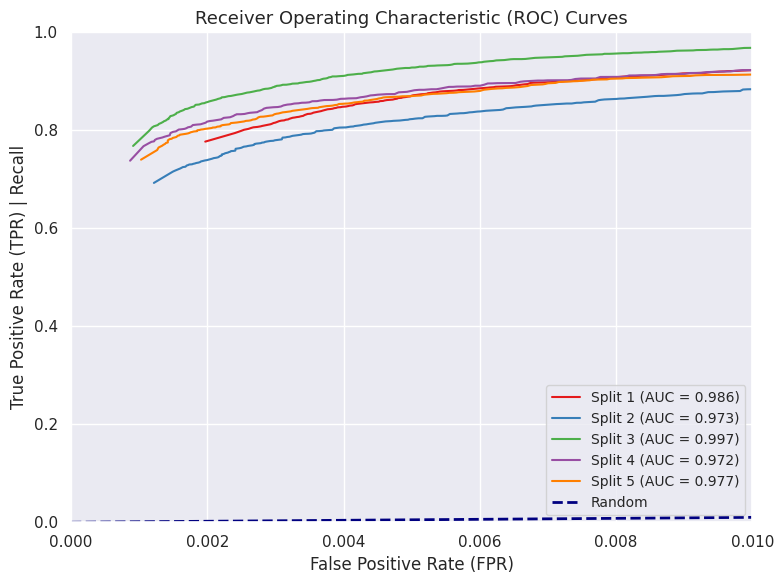

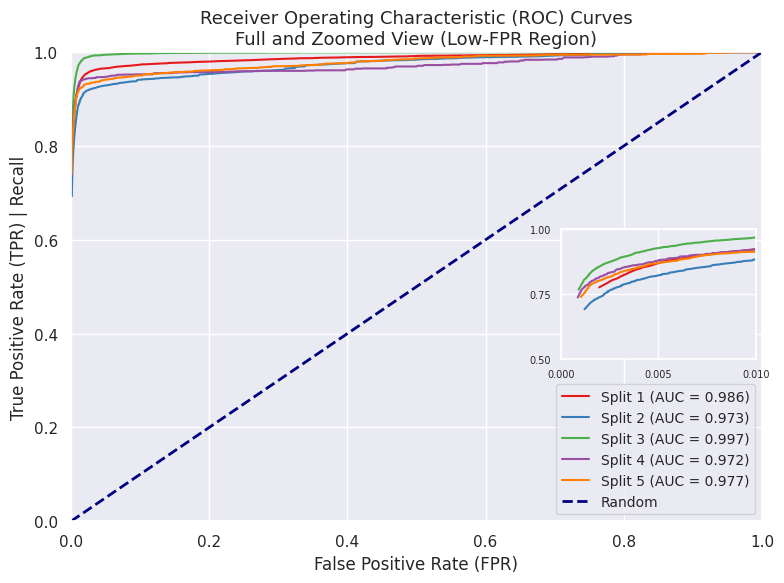

In [14]:
def update_evaluation_summary_json_file(data):
    """
    Overwrites the JSON file on disk with the updated data.

    Parameters:
    - data (dict): The updated dictionary to write to the file.
    """
    try:
        # Ensure the directory exists
        json_path = os.path.join(execution_dir, "new_evaluation_without_training.json")

        # Write the updated data to the file, overwriting it
        with open(json_path, 'w') as json_file:
            print(json.dump(data, json_file, indent=4))

        print(f"JSON file successfully updated at: {json_path}")

    except Exception as e:
        print(f"An error occurred while updating the JSON file: {e}")

# Generate the evaluation summary
evaluation_summary = {
    "total_execution_time_seconds": None,
    "splits": [],

    "average_testing_roc_auc": None,
    
    "average_testing_iou_thres_0_5": None,
    "average_testing_f1_thres_0_5": None,
    "average_testing_fpr_thres_0_5": None,
    "average_testing_tpr_thres_0_5": None,

    "average_testing_best_thres": None,
    "average_testing_iou_avg_best_thres": None,
    "average_testing_f1_avg_best_thres": None,
    "average_testing_fpr_avg_best_thres": None,
    "average_testing_tpr_avg_best_thres": None,
}

update_evaluation_summary_json_file(evaluation_summary)

# Measure start training time
start_execution_time = time.time()

print(f"Evaluation (no training) starts at: {datetime.now()}\n")
print()

split_metrics = []
split_predictions_probabilities = []
split_gt = []



for split_idx, (train_files, test_files) in enumerate(train_test_splits_orginal_copy):

    # Clear the GPU cache between splits
    torch.cuda.empty_cache()

    split_details = {
        "split_index": split_idx,
        "test_samples": None,
        
        "roc_auc": None,
        
        "testing_iou_thres_0_5": None,
        "testing_f1_thres_0_5": None,
        "testing_fpr_thres_0_5": None,
        "testing_tpr_thres_0_5": None,

        "testing_best_thres": None,
        "testing_iou_best_thres": None,
        "testing_f1_best_thres": None,
        "testing_fpr_best_thres": None,
        "testing_tpr_best_thres": None,
        
        "testing_iou_avg_best_thres": None,
        "testing_f1_avg_best_thres": None,
        "testing_fpr_avg_best_thres": None,
        "testing_tpr_avg_best_thres": None,
    }
    
    evaluation_summary["splits"].append(split_details)
    update_evaluation_summary_json_file(evaluation_summary)
       
    evaluation_summary["splits"][split_idx]["test_samples"] = list(test_files.keys())

    update_evaluation_summary_json_file(evaluation_summary)    

    ############################################################################################
    ################################### TESTING DATA PREPARATION ###############################
    ############################################################################################
    
    print()
    print(f"{'=' * 10} TESTING DATA PREPARATION {'=' * 10}")
    print()
    
    print(f" SAMPLES: {test_files.keys()}")
    print()
    
    test_dataset = SwinUNETR_AIRT_Dataset(
        is_inference_mode = True,
        augmentation = False,
        metadata_dict_with_files_selected=test_files,
        data_dir=DATA_DIR,
        model_input_dims=best_trial_config["ARCHITECTURE_CONFIG"]["model_input_dimensions"],
        overlap = best_trial_config["TRAINING_CONFIG"]["overlap_inference"],
        preprocessing_strategy = best_trial_config["TRAINING_CONFIG"]["pre_processing_strategy"]
    )
       
    test_loader = DataLoader(test_dataset, batch_size=best_trial_config["TRAINING_CONFIG"]["batch_size_inference"], collate_fn=custom_collate, num_workers=NUM_WORKERS)

    ####################################################################################
    ############################## TESTING #############################################
    ####################################################################################
    
    print()
    print(f"{'=' * 10} TESTING STARTS {'=' * 10}")
    print()
            
    # Measure start training time
    start_time = time.time()

    split_dir = os.path.join(execution_dir, f"train_test_split_{split_idx}")

    # Model checkpoint callback    
    checkpoint_callback = ModelCheckpoint(
        monitor='val_loss',
        dirpath=split_dir,
        filename="best-checkpoint-{epoch:02d}-{val_loss:.2f}",
        save_top_k=1,
        mode='min'
    )
    
    # Early stopping callback
    early_stopping_callback = EarlyStopping(
        monitor='val_loss',
        patience=best_trial_config["TRAINING_CONFIG"]["patience_epochs_early_stopping"],
        mode='min'
    )
    
    # Define logger
    logger = CSVLogger(
        save_dir=split_dir,
        name="",
        version="")
    
    trainer = Trainer(
        max_epochs=best_trial_config["TRAINING_CONFIG"]["max_training_epochs"],
        callbacks=[checkpoint_callback, early_stopping_callback],
        log_every_n_steps=1, # log every n batches
        logger=logger,
        precision="16-mixed",  # Enable FP16 mixed precision
        accumulate_grad_batches=best_trial_config["TRAINING_CONFIG"]["num_batches_grad_accumulation"],
        #max_time="00:00:05:00"  # Limit TIME (DD:HH:MM:SS format)
    )
    
    # Find all .ckpt files in the directory
    ckpt_files = [filename for filename in os.listdir(split_dir) if filename.endswith('.ckpt')]
    
    # Handle different cases
    if not ckpt_files:
        raise FileNotFoundError(f"No .ckpt file found in the directory: {split_dir}")
    elif len(ckpt_files) > 1:
        raise RuntimeError(f"Multiple .ckpt files found in the directory: {split_dir} -> {ckpt_files}")
    else:
        model_checkpoint_path = os.path.join(split_dir, ckpt_files[0])
        print(f"Found checkpoint: {model_checkpoint_path}")
    
    # Load the best model
    best_model = SwinUNETR_AIRT_LightningModel.load_from_checkpoint(
        checkpoint_path=model_checkpoint_path,
        
        # Training Configuration
        training_config=best_trial_config["TRAINING_CONFIG"],            
        # Architecture Configuration
        architecture_config=best_trial_config["ARCHITECTURE_CONFIG"],            
        # Attention Configuration
        attention_config=best_trial_config["ATTENTION_CONFIG"],
        # Normalization Configuration
        normalization_config=best_trial_config["NORMALIZATION_CONFIG"],         
        # Regularization Configuration
        regularization_config=best_trial_config["REGULARIZATION_CONFIG"]
    )
    
    test_results = trainer.test(best_model, dataloaders=test_loader)[0]
    
    # Measure end training time
    end_time = time.time()
    
    # Calculate and print the elapsed time
    testing_elapsed_time = end_time - start_time
    
    print(f"Testing completed in {testing_elapsed_time // 3600:.0f}h {testing_elapsed_time % 3600 // 60:.0f}m {testing_elapsed_time % 60:.0f}s")
    
    print()
    print(f"{'=' * 10} TESTING FINISHED {'=' * 10}")
    print()


    #############################################################################################
    #############################################################################################
    #############################################################################################    

    
    num_samples = len(best_model.test_predictions_probabilities)
    split_predictions_probabilities.append(best_model.test_predictions_probabilities)
    split_gt.append(best_model.test_ground_truths)

    fpr_all = []
    tpr_all = []
    iou_all = []
    f1_all = []
    roc_auc = None

    # Flatten all tensors, concatenate, convert to NumPy, and get unique values
    all_values = torch.cat([tensor.flatten() for tensor in best_model.test_predictions_probabilities])
    unique_values = np.unique(all_values.cpu().numpy())
    sampled_index_thresholds = np.linspace(0, len(unique_values) - 1, 1000, dtype=int)
    thresholds = unique_values[sampled_index_thresholds]

    # Adding custom 0.5 threshold
    insert_idx = np.searchsorted(thresholds, 0.5)
    thresholds = np.insert(thresholds, insert_idx, 0.5)

    # thresholds = np.linspace(0, 1, 101)

    for thresh in thresholds:
        fpr_list = []
        tpr_list = []
        iou_list = []
        f1_list = []

        for i in range(num_samples):
            pred_binary = (best_model.test_predictions_probabilities[i] >= thresh).int().cpu().numpy().flatten()
            gt_flat = best_model.test_ground_truths[i].int().cpu().numpy().flatten()

            # Safely handle empty classes
            try:
                tn, fp, fn, tp = confusion_matrix(gt_flat, pred_binary, labels=[0, 1]).ravel()
            except ValueError:
                tn = fp = fn = tp = 0

            tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
            fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
            iou = tp / (tp + fp + fn) if (tp + fp + fn) > 0 else 0
            f1 = 2 * tp / (2 * tp + fp + fn) if (2 * tp + fp + fn) > 0 else 0

            fpr_list.append(fpr)
            tpr_list.append(tpr)
            iou_list.append(iou)
            f1_list.append(f1)

        # Average over samples
        fpr_all.append(np.mean(fpr_list))
        tpr_all.append(np.mean(tpr_list))
        iou_all.append(np.mean(iou_list))
        f1_all.append(np.mean(f1_list))

    roc_auc = auc(fpr_all, tpr_all)

    split_metrics.append({
        "thresholds": thresholds,
        "fpr_values": fpr_all,
        "tpr_values": tpr_all,
        "iou_values": iou_all,
        "f1_values": f1_all,
        "roc_auc": roc_auc
    })

    target_fpr = 0.005
    idx_best_thres = np.argmin(np.abs(np.array(fpr_all) - target_fpr))
    best_thres = thresholds[idx_best_thres]

    index_0_5 = np.where(split_metrics[-1]["thresholds"] == 0.5)[0][0]

    evaluation_summary["splits"][split_idx]["testing_best_thres"] = float(best_thres)
    evaluation_summary["splits"][split_idx]["testing_iou_best_thres"] = float(split_metrics[-1]["iou_values"][idx_best_thres])
    evaluation_summary["splits"][split_idx]["testing_f1_best_thres"] = float(split_metrics[-1]["f1_values"][idx_best_thres])
    evaluation_summary["splits"][split_idx]["testing_fpr_best_thres"] = float(split_metrics[-1]["fpr_values"][idx_best_thres])
    evaluation_summary["splits"][split_idx]["testing_tpr_best_thres"] = float(split_metrics[-1]["tpr_values"][idx_best_thres])
    evaluation_summary["splits"][split_idx]["testing_iou_thres_0_5"] = float(split_metrics[-1]["iou_values"][index_0_5])
    evaluation_summary["splits"][split_idx]["testing_f1_thres_0_5"] = float(split_metrics[-1]["f1_values"][index_0_5])
    evaluation_summary["splits"][split_idx]["testing_fpr_thres_0_5"] = float(split_metrics[-1]["fpr_values"][index_0_5])
    evaluation_summary["splits"][split_idx]["testing_tpr_thres_0_5"] = float(split_metrics[-1]["tpr_values"][index_0_5])
    evaluation_summary["splits"][split_idx]["roc_auc"] = float(roc_auc)
    
    update_evaluation_summary_json_file(evaluation_summary)

    ####################################################################################
    ############################## PLOTTING TEST RESULTS ###############################
    ####################################################################################

    testing_folder = os.path.join(split_dir, "testing_results")
    os.makedirs(testing_folder, exist_ok=True)
    
    print()
    print(f"{'=' * 10} PLOTTING TEST RESULTS {'=' * 10}")
    print(f"{'=' * 10} GROUND TRUTH VS PREDICTIONS {'=' * 10}")
    print()

    # Control the maximum number of samples to show
    num_samples_to_show = 9
    
    # Adjust the number of samples if fewer samples are available
    available_samples = list(zip(
        best_model.test_sample_ids,
        best_model.test_ground_truths,
        best_model.test_predictions,
        best_model.test_predictions_probabilities
        
    ))
    
    if len(available_samples) < num_samples_to_show:
        print(f"Number of available samples ({len(available_samples)}) is less than requested ({num_samples_to_show}). Plotting all available samples.")
        num_samples_to_show = len(available_samples)
    
    # Randomly sample the data if more samples are available than requested
    plot_samples = random.sample(available_samples, num_samples_to_show)
    
    # Calculate the number of rows needed (3 pairs per row)
    pairs_per_row = 3
    num_rows = (num_samples_to_show + pairs_per_row - 1) // pairs_per_row  # Ceiling division

    # Find unique classes dynamically
    all_classes = set()
    for gt, pred in zip(best_model.test_ground_truths, best_model.test_predictions):
        all_classes.update(torch.unique(gt).tolist())  # Add classes from ground truth
        all_classes.update(torch.unique(pred).tolist())  # Add classes from predictions
    
    # Sort the classes to ensure order
    all_classes = sorted(all_classes)
    
    # Define class labels dynamically (for simplicity, use numeric labels for now)
    class_labels = {cls: f"Class {cls}" for cls in all_classes}
    num_classes = len(class_labels)
    
    # Create a discrete colormap with exactly `num_classes` colors
    colormap = plt.cm.get_cmap("viridis", num_classes)
    
    # Create legend patches using discrete colors from the colormap
    legend_patches = [
        mpatches.Patch(color=colormap(i), label=f"{i}: {label}")
        for i, label in class_labels.items()
    ]
    # Create subplots
    fig, axes = plt.subplots(num_rows, pairs_per_row * 2, figsize=(15, 5 * num_rows))
    
    # If there's only one row, ensure axes is 2D
    if num_rows == 1:
        axes = [axes]
    
    # Flatten axes for easier indexing
    axes = [ax for row_axes in axes for ax in (row_axes if isinstance(row_axes, (list, np.ndarray)) else [row_axes])]
    
    # Plot ground truth and predictions
    for idx, (sample_id, ground_truth, prediction, prediction_prob) in enumerate(plot_samples):
        # Calculate column index (each pair takes two columns)
        col_idx = idx * 2
    
        # Ground truth
        axes[col_idx].imshow(ground_truth.cpu().numpy(), cmap="viridis", interpolation="none",
                             vmin=min(all_classes), vmax=max(all_classes))
        axes[col_idx].set_title(f"Sample {sample_id}\n Ground Truth \n [{ground_truth.shape[0]} x {ground_truth.shape[1]}]")
        axes[col_idx].axis("off")

        # Saving ground truth image
        ground_truth_data = ground_truth.cpu().numpy()  # Convert to NumPy array
        ground_truth_colored = apply_colormap_and_normalize(
            ground_truth_data, cmap="viridis", vmin=min(all_classes), vmax=max(all_classes)
        )
        ground_truth_img = Image.fromarray(ground_truth_colored)  # Convert to Pillow Image
        ground_truth_img.save(os.path.join(testing_folder, f"{sample_id}_gt.png"))
    
        # Prediction
        axes[col_idx + 1].imshow(prediction.cpu().numpy(), cmap="viridis", interpolation="none",
                                 vmin=min(all_classes), vmax=max(all_classes))
        axes[col_idx + 1].set_title(f"Sample {sample_id}\n Prediction \n [{prediction.shape[0]} x {prediction.shape[1]}]")
        axes[col_idx + 1].axis("off")

        # Saving prediction image
        prediction_data = prediction.cpu().numpy()  # Convert to NumPy array
        prediction_colored = apply_colormap_and_normalize(
            prediction_data, cmap="viridis", vmin=min(all_classes), vmax=max(all_classes)
        )
        prediction_img = Image.fromarray(prediction_colored)  # Convert to Pillow Image
        prediction_img.save(os.path.join(testing_folder, f"{sample_id}_pred.png"))

        prediction_prob.cpu().numpy().astype(np.float32).tofile(os.path.join(testing_folder, f"{sample_id}_pred_prob_map.raw"))
    
    # Hide any unused subplots
    for unused_ax in axes[len(plot_samples) * 2:]:
        unused_ax.axis("off")
    
    # Add legend
    fig.legend(
        handles=legend_patches,
        loc="upper center",  # Places the legend below the plot
        ncol=len(all_classes),
        bbox_to_anchor=(0.5, 0.9),  # Adjusts position below the plot
        fontsize=12
    )

    # Titles for the plots
    plot_title_template = (
        f"Number Testing Patches: {len(test_dataset)}\n"
        f"Pixel-Wise Metrics: Test IoU: { evaluation_summary['splits'][split_idx]['testing_iou_thres_0_5']:.4f} - "
        f"Test F1-Score: {evaluation_summary['splits'][split_idx]['testing_f1_thres_0_5']:.4f}\n"
        f"Test FPR: {evaluation_summary['splits'][split_idx]['testing_fpr_thres_0_5']:.4f} - "
        f"Test TPR/Recall: {evaluation_summary['splits'][split_idx]['testing_tpr_thres_0_5']:.4f} - "
        f"Test ROC-AUC: {evaluation_summary['splits'][split_idx]['roc_auc']:.4f}"
        
    )
    
    # Add title
    fig.suptitle(
        f"Split {split_idx} (Testing Results)\nGround Truth vs Prediction\n" + plot_title_template,
        fontsize=16, y=1.10
    )
    
    plt.tight_layout(rect=[0, 0, 1, 0.85])
    result_plot_path = os.path.join(testing_folder, f"testing_gt_vs_pred_split_{split_idx}.svg")
    fig.savefig(result_plot_path, format="svg", bbox_inches="tight")
    print(f"Testing results plot for split {split_idx} saved at: {result_plot_path}")
    plt.show()
    plt.close(fig)  
    
    del best_model
    del trainer
    torch.cuda.empty_cache()
    gc.collect()    

# Measure end training time
end_execution_time = time.time()
    
# Calculate and print the elapsed time
elapsed_execution_time = end_execution_time - start_execution_time

####################################################################################
############################ ANALYSING SPLIT PERFORMANCE ###########################
####################################################################################

testing_iou_thres_0_5_splits = [split["testing_iou_thres_0_5"] for split in sorted(evaluation_summary["splits"], key=lambda x: x["split_index"])]
testing_f1_thres_0_5_splits = [split["testing_f1_thres_0_5"] for split in sorted(evaluation_summary["splits"], key=lambda x: x["split_index"])]
testing_fpr_thres_0_5_splits = [split["testing_fpr_thres_0_5"] for split in sorted(evaluation_summary["splits"], key=lambda x: x["split_index"])]
testing_tpr_thres_0_5_splits = [split["testing_tpr_thres_0_5"] for split in sorted(evaluation_summary["splits"], key=lambda x: x["split_index"])]
testing_best_thres_splits = [split["testing_best_thres"] for split in sorted(evaluation_summary["splits"], key=lambda x: x["split_index"])]
testing_roc_auc_splits = [split["roc_auc"] for split in sorted(evaluation_summary["splits"], key=lambda x: x["split_index"])]

average_testing_best_thres = float(np.mean(testing_best_thres_splits))

# Update the evaluation summary
evaluation_summary["total_execution_time_seconds"] = elapsed_execution_time
evaluation_summary["average_testing_iou_thres_0_5"] = float(np.mean(testing_iou_thres_0_5_splits))
evaluation_summary["average_testing_f1_thres_0_5"] = float(np.mean(testing_f1_thres_0_5_splits))
evaluation_summary["average_testing_fpr_thres_0_5"] = float(np.mean(testing_fpr_thres_0_5_splits))
evaluation_summary["average_testing_tpr_thres_0_5"] = float(np.mean(testing_tpr_thres_0_5_splits))
evaluation_summary["average_testing_best_thres"] = float(np.mean(average_testing_best_thres))
evaluation_summary["average_testing_roc_auc"] = float(np.mean(testing_roc_auc_splits))
update_evaluation_summary_json_file(evaluation_summary)


for split_idx, (split_predictions_probabilities, split_gt) in enumerate(zip(split_predictions_probabilities,split_gt)):
    
    num_samples = len(split_predictions_probabilities)

    fpr_list = []
    tpr_list = []
    iou_list = []
    f1_list = []
    
    for i in range(num_samples):
        pred_binary = (split_predictions_probabilities[i] >= average_testing_best_thres).int().cpu().numpy().flatten()
        gt_flat = split_gt[i].int().cpu().numpy().flatten()

        # Safely handle empty classes
        try:
            tn, fp, fn, tp = confusion_matrix(gt_flat, pred_binary, labels=[0, 1]).ravel()
        except ValueError:
            tn = fp = fn = tp = 0

        tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
        fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
        iou = tp / (tp + fp + fn) if (tp + fp + fn) > 0 else 0
        f1 = 2 * tp / (2 * tp + fp + fn) if (2 * tp + fp + fn) > 0 else 0

        fpr_list.append(fpr)
        tpr_list.append(tpr)
        iou_list.append(iou)
        f1_list.append(f1)

    evaluation_summary["splits"][split_idx]["testing_iou_avg_best_thres"] = float(np.mean(iou_list))
    evaluation_summary["splits"][split_idx]["testing_f1_avg_best_thres"] = float(np.mean(f1_list))
    evaluation_summary["splits"][split_idx]["testing_fpr_avg_best_thres"] = float(np.mean(fpr_list))
    evaluation_summary["splits"][split_idx]["testing_tpr_avg_best_thres"] = float(np.mean(tpr_list))
    
testing_iou_avg_best_thres_splits = [split["testing_iou_avg_best_thres"] for split in sorted(evaluation_summary["splits"], key=lambda x: x["split_index"])]
testing_f1_avg_best_thres_splits = [split["testing_f1_avg_best_thres"] for split in sorted(evaluation_summary["splits"], key=lambda x: x["split_index"])]
testing_fpr_avg_best_thres_splits = [split["testing_fpr_avg_best_thres"] for split in sorted(evaluation_summary["splits"], key=lambda x: x["split_index"])]
testing_tpr_avg_best_thres_splits = [split["testing_tpr_avg_best_thres"] for split in sorted(evaluation_summary["splits"], key=lambda x: x["split_index"])]

evaluation_summary["average_testing_iou_avg_best_thres"] = float(np.mean(testing_iou_avg_best_thres_splits))
evaluation_summary["average_testing_f1_avg_best_thres"] = float(np.mean(testing_f1_avg_best_thres_splits))
evaluation_summary["average_testing_fpr_avg_best_thres"] = float(np.mean(testing_fpr_avg_best_thres_splits))
evaluation_summary["average_testing_tpr_avg_best_thres"] = float(np.mean(testing_tpr_avg_best_thres_splits))
update_evaluation_summary_json_file(evaluation_summary)

#############################################################################################################################
############# Obtaining Threshold that Maximizes F1-Score (Code only valid every split has same thresholds) #################
#############################################################################################################################

# # F1-Score 2D matrix: Each row corresponds to the F1-values per split across thresholds
# f1_matrix = np.array([d["f1_values"] for d in split_metrics])
# # Compute average F1-score across splits
# average_f1 = np.mean(f1_matrix, axis=0)

# # IoU 2D matrix: Each row corresponds to the IoU-values per split across thresholds
# iou_matrix = np.array([d["iou_values"] for d in split_metrics])
# # Compute average IoU across splits
# average_iou = np.mean(iou_matrix, axis=0)

# # TPR 2D matrix: Each row corresponds to the TPR-values per split across thresholds
# tpr_matrix = np.array([d["tpr_values"] for d in split_metrics])
# # Compute average TPR across splits
# average_tpr = np.mean(tpr_matrix, axis=0)

# # FPR 2D matrix: Each row corresponds to the FPR-values per split across thresholds
# fpr_matrix = np.array([d["fpr_values"] for d in split_metrics])
# # Compute average FPR across splits
# average_fpr = np.mean(fpr_matrix, axis=0)



# # Get the maximum F1-score and its index
# max_f1_score = np.max(average_f1)
# max_f1_index = np.argmax(average_f1)

# best_threshold = split_metrics[0]["thresholds"][max_f1_index]

# best_threshold_f1 = split_metrics[0]["f1_values"][max_f1_index]
# best_threshold_iou = split_metrics[0]["iou_values"][max_f1_index]
# best_threshold_tpr = split_metrics[0]["tpr_values"][max_f1_index]
# best_threshold_fpr = split_metrics[0]["fpr_values"][max_f1_index]

# print("#"*20)
# print("#"*20)
# print()
# detailed_output = f"Threshold maximizing average F1-score: {best_threshold:.4f}\n" \
#                   f"- F1-score: {best_threshold_f1:.4f}\n" \
#                   f"- IoU:      {best_threshold_iou:.4f}\n" \
#                   f"- TPR:      {best_threshold_tpr:.4f}\n" \
#                   f"- FPR:      {best_threshold_fpr:.4f}\n"
# print(detailed_output)
# print()
# print("#"*20)
# print("#"*20)



###########################################################################
#############              Plotting ROC Curve             #################
###########################################################################

import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime  # just in case it's not imported

# Set Seaborn style (darker grid background)
sns.set(style="darkgrid")
palette = sns.color_palette("Set1", len(split_metrics))  # Colorful and distinct

fig, ax = plt.subplots(figsize=(8, 6))

# Plot ROC for each split with a distinct color
for i, (metrics, color) in enumerate(zip(split_metrics, palette)):
    fpr = metrics["fpr_values"]
    tpr = metrics["tpr_values"]
    auc_val = metrics["roc_auc"]

    label = f"Split {i+1} (AUC = {auc_val:.3f})"
    ax.plot(fpr, tpr, label=label, color=color)

# Plot the random baseline
ax.plot([0, 1], [0, 1], linestyle='--', color='navy', linewidth=2, label="Random")

# Format the title and axes to match the example image
ax.set_title("Receiver Operating Characteristic (ROC) Curves", fontsize=13)

ax.set_xlabel("False Positive Rate (FPR)", fontsize=12)
ax.set_ylabel("True Positive Rate (TPR) | Recall", fontsize=12)
ax.set_xlim([0.0, 0.01])
ax.set_ylim([0.0, 1.0])
ax.legend(loc="lower right", fontsize=10)
ax.grid(True)

plt.tight_layout()

# Save plot
plot_path = os.path.join(execution_dir, "roc_curves.svg")
fig.savefig(plot_path, format="svg", bbox_inches="tight")

# Log completion
print()
print(f"ROC curve saved to: {plot_path}")

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import os

# Use seaborn style
sns.set(style="darkgrid")
palette = sns.color_palette("Set1", len(split_metrics))

# Create main figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot ROC curves for each split
for i, (metrics, color) in enumerate(zip(split_metrics, palette)):
    fpr = metrics["fpr_values"]
    tpr = metrics["tpr_values"]
    auc_val = metrics["roc_auc"]
    label = f"Split {i+1} (AUC = {auc_val:.3f})"
    ax.plot(fpr, tpr, label=label, color=color)

# Plot random baseline
ax.plot([0, 1], [0, 1], linestyle='--', color='navy', linewidth=2, label="Random")

# Titles and labels
ax.set_title("Receiver Operating Characteristic (ROC) Curves\nFull and Zoomed View (Low-FPR Region)", fontsize=13)
ax.set_xlabel("False Positive Rate (FPR)", fontsize=12)
ax.set_ylabel("True Positive Rate (TPR) | Recall", fontsize=12)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.legend(loc="lower right", fontsize=10)

# Add inset axes (zoomed in on low FPR region)
axins = inset_axes(ax, width=1.95, height=1.3, loc="lower center", bbox_to_anchor=(0.85, 0.28),
                   bbox_transform=ax.transAxes, borderpad=2)
for i, (metrics, color) in enumerate(zip(split_metrics, palette)):
    fpr = metrics["fpr_values"]
    tpr = metrics["tpr_values"]
    axins.plot(fpr, tpr, color=color)

# Inset settings
axins.set_xlim(0.0, 0.01)
axins.set_ylim(0.5, 1.0)
axins.set_xticks([0.0, 0.005, 0.01])
axins.set_yticks([0.5, 0.75, 1.0])
axins.tick_params(axis='x', labelsize=7)
axins.tick_params(axis='y', labelsize=7)
axins.tick_params(axis='x', pad=1)  # default is ~4–6
axins.tick_params(axis='y', pad=1)
axins.grid(True)

plt.tight_layout()
# Save plot
plot_path = os.path.join(execution_dir, "roc_curves_with_zoom.svg")
fig.savefig(plot_path, format="svg", bbox_inches="tight")

print(f"Evaluation (no training) finishes at: {datetime.now()}\n")